# UNB - PPGI
# Processamento de Imagem
## Trabalho 09

Henrique Brandão

___

Faça um projeto de processamento de imagens interessante utilizando os conhecimentos que você adquiriu durante o curso. 

- https://pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/
- https://docs.replit.com/tutorials/python/steganography
- https://betterprogramming.pub/image-steganography-using-python-2250896e48b9
- 

<br>

- https://www.section.io/engineering-education/license-plate-detection-and-recognition-using-opencv-and-pytesseract/

<br>

- https://www.shiksha.com/online-courses/articles/10-image-processing-projects-for-beginners-and-experts/#Face-Detection
- https://www.tutorialspoint.com/how-to-detect-license-plates-using-opencv-python
- https://www.geeksforgeeks.org/license-plate-recognition-with-opencv-and-tesseract-ocr/
- https://medium.com/augmented-startups/automatic-number-plate-recognition-with-easy-ocr-and-open-cv-6d121384cdc7
- 
  

In [11]:
import cv2
import warnings

warnings.filterwarnings('ignore')

import pytesseract

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

%matplotlib inline

In [13]:
!ls

img01.png  img02.png  trab09.ipynb


In [14]:
f1, f2 = 'img01.png', 'img02.png'

x1 = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2RGB)
x2 = cv2.cvtColor(cv2.imread(f2), cv2.COLOR_BGR2RGB)

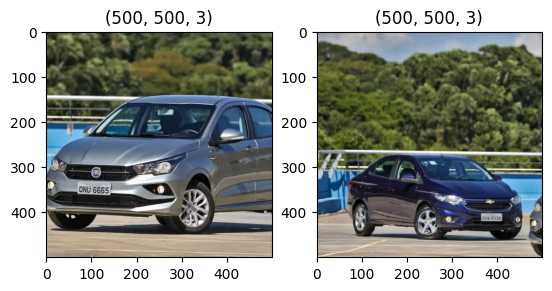

In [16]:
plt.subplot(1,2,1)
plt.title(x1.shape)
plt.imshow(x1)

plt.subplot(1,2,2)
plt.title(x2.shape)
plt.imshow(x2)

plt.show()

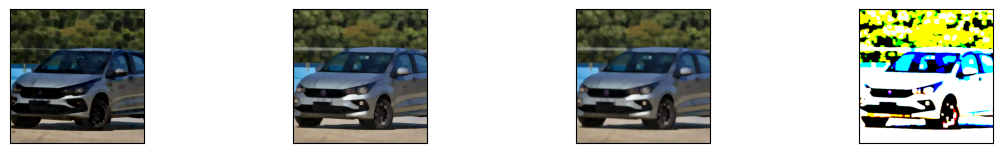

In [23]:
kernel = np.ones((10,10), np.uint8)

erosao = lambda x: cv2.erode(x, kernel, iterations=1)
dilatacao = lambda x: cv2.dilate(x, kernel, iterations=1)
tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]

plt.figure(figsize=(14,8))

__ = (
    erosao(x1),
    dilatacao(erosao(x1)),
    cv2.blur(dilatacao(erosao(x1)), ksize=(5,5)),
    tresh(cv2.blur(dilatacao(erosao(x1)), ksize=(5,5)))
)

for i,_ in enumerate(__):
    plt.subplot(len(__),4,i+1)
    plt.imshow(_)
    plt.xticks([])
    plt.yticks([])

plt.show()